In [62]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error

import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

import seaborn as sns

#  Import and read our cleaned data.
import pandas as pd
url = "https://raw.githubusercontent.com/natbiorg/project_4/refs/heads/main/analysis_and_resources/Resources/cleaned.csv"
data_df = pd.read_csv(url)
data_df.head()


,Customer_ID,Gender,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Average_Price,...,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_Percentage,Near_Holiday,State,Total_Sales,Total_Cost,Average_Saved($)
0,17850.0,M,12.0,16679.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest Smart Devices,1.0,153.71,...,4500.0,2424.5,1,ELEC10,10.0,New Year's Day,Illinois,153.71,144.839,15.371
1,17850.0,M,12.0,16680.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest Smart Devices,1.0,153.71,...,4500.0,2424.5,1,ELEC10,10.0,New Year's Day,Illinois,153.71,144.839,15.371
2,17850.0,M,12.0,16696.0,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest Smart Devices,2.0,122.77,...,4500.0,2424.5,1,ELEC10,10.0,New Year's Day,Illinois,245.54,227.486,12.277
3,17850.0,M,12.0,16699.0,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest Smart Devices,1.0,81.50,...,4500.0,2424.5,1,ELEC10,10.0,New Year's Day,Illinois,81.50,79.850,8.150
4,17850.0,M,12.0,16700.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest Smart Devices,1.0,153.71,...,4500.0,2424.5,1,ELEC10,10.0,New Year's Day,Illinois,153.71,144.839,15.371


In [63]:
data_df.columns

Index(['Customer_ID', 'Gender', 'Tenure_Months', 'Transaction_ID',
       'Transaction_Date', 'Product_SKU', 'Product_Description',
       'Product_Category', 'Quantity', 'Average_Price', 'Delivery_Charges',
       'Coupon_Status', 'GST', 'Offline_Spend', 'Online_Spend', 'Month',
       'Coupon_Code', 'Discount_Percentage', 'Near_Holiday', 'State',
       'Total_Sales', 'Total_Cost', 'Average_Saved($)'],
      dtype='object')

In [64]:
data_df.nunique()

,0
Customer_ID,1469
Gender,2
Tenure_Months,50
Transaction_ID,25062
Transaction_Date,365
Product_SKU,1145
Product_Description,404
Product_Category,13
Quantity,152
Average_Price,547


In [65]:
data_df = data_df.drop(['Customer_ID', 'Transaction_ID', 'Product_SKU', 'Product_Description', 'Coupon_Code'], axis=1)

In [66]:
data_df['Transaction_Date'] = pd.to_datetime(data_df['Transaction_Date'])
data_df['Transaction_Date_Ordinal'] = data_df['Transaction_Date'].apply(lambda date: date.toordinal())
data_df.drop(['Transaction_Date'], axis=1, inplace=True)

In [67]:
data_df.dtypes
# To dummy Gender, Product_Category, Coupon_Status, Near_Holiday, State
# Convert Transaction Date to date type

,0
Gender,object
Tenure_Months,float64
Product_Category,object
Quantity,float64
Average_Price,float64
Delivery_Charges,float64
Coupon_Status,object
GST,float64
Offline_Spend,float64
Online_Spend,float64


In [68]:
data_df.dtypes

,0
Gender,object
Tenure_Months,float64
Product_Category,object
Quantity,float64
Average_Price,float64
Delivery_Charges,float64
Coupon_Status,object
GST,float64
Offline_Spend,float64
Online_Spend,float64


In [69]:
cost_by_date = data_df.groupby('Transaction_Date_Ordinal')['Total_Cost'].sum()
cost_by_date.head(50)

,Total_Cost
Transaction_Date_Ordinal,
737060,7720.980286
737061,12952.991843
737062,25097.583139
737063,16425.958227
737064,18041.991213
737065,15022.964321
737066,5659.036000
737067,7944.360000
737068,20405.120631


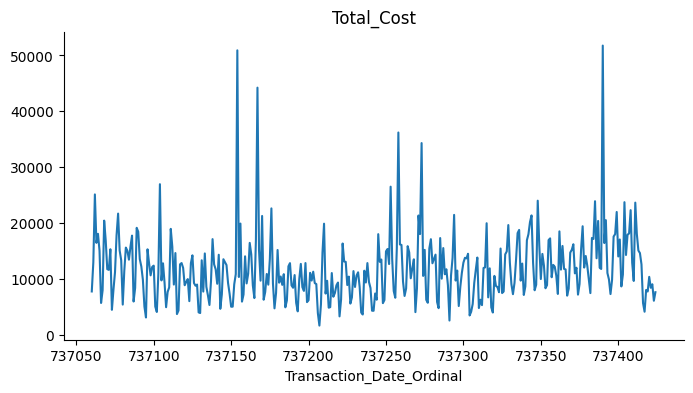

In [70]:
cost_by_date.plot(kind='line', figsize=(8, 4), title='Total_Cost')
plt.gca().spines[['top', 'right']].set_visible(False)

In [71]:
data_cat =  data_df.dtypes[data_df.dtypes == "object"].index.tolist()
enc = OneHotEncoder(sparse_output=False)

encode_df = pd.DataFrame(enc.fit_transform(data_df[data_cat]))

encode_df.columns = enc.get_feature_names_out()

data_df = data_df.merge(encode_df,left_index=True, right_index=True)
data_df = data_df.drop(data_cat, axis=1)
data_df.head()

#TODO Change Near Holiday to  a Binary?

,Tenure_Months,Quantity,Average_Price,Delivery_Charges,GST,Offline_Spend,Online_Spend,Month,Discount_Percentage,Total_Sales,...,Near_Holiday_New Year's Day,Near_Holiday_Thanksgiving Day,Near_Holiday_Veterans Day,Near_Holiday_Washington's Birthday,Near_Holiday_nan,State_California,State_Illinois,State_New Jersey,State_New York,State_Washington DC
0,12.0,1.0,153.71,6.5,0.1,4500.0,2424.5,1,10.0,153.71,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,12.0,1.0,153.71,6.5,0.1,4500.0,2424.5,1,10.0,153.71,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,12.0,2.0,122.77,6.5,0.1,4500.0,2424.5,1,10.0,245.54,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,12.0,1.0,81.50,6.5,0.1,4500.0,2424.5,1,10.0,81.50,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,12.0,1.0,153.71,6.5,0.1,4500.0,2424.5,1,10.0,153.71,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [72]:
data_df.dtypes

,0
Tenure_Months,float64
Quantity,float64
Average_Price,float64
Delivery_Charges,float64
GST,float64
Offline_Spend,float64
Online_Spend,float64
Month,int64
Discount_Percentage,float64
Total_Sales,float64


In [73]:
# Dummied Gender, Product_Category, Coupon_Status, Near_Holiday, State - drop 1 of each cat

data_df = data_df.drop(['State_New Jersey', 'Near_Holiday_Columbus Day', 'Coupon_Status_Clicked', 'Gender_F', 'Product_Category_Stationery'], axis=1, inplace=False)
data_df.head()

,Tenure_Months,Quantity,Average_Price,Delivery_Charges,GST,Offline_Spend,Online_Spend,Month,Discount_Percentage,Total_Sales,...,Near_Holiday_Memorial Day,Near_Holiday_New Year's Day,Near_Holiday_Thanksgiving Day,Near_Holiday_Veterans Day,Near_Holiday_Washington's Birthday,Near_Holiday_nan,State_California,State_Illinois,State_New York,State_Washington DC
0,12.0,1.0,153.71,6.5,0.1,4500.0,2424.5,1,10.0,153.71,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,12.0,1.0,153.71,6.5,0.1,4500.0,2424.5,1,10.0,153.71,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,12.0,2.0,122.77,6.5,0.1,4500.0,2424.5,1,10.0,245.54,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,12.0,1.0,81.50,6.5,0.1,4500.0,2424.5,1,10.0,81.50,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,12.0,1.0,153.71,6.5,0.1,4500.0,2424.5,1,10.0,153.71,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [74]:
data_df['Total_Cost'].describe()

,Total_Cost
count,52955.000000
mean,81.242177
std,138.915730
min,3.708000
25%,16.800000
50%,36.231000
75%,112.816000
max,8552.000000


In [75]:
y = data_df['Total_Cost']
X = data_df.drop(['Total_Cost'], axis =1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [76]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [77]:
len(data_df.columns)

44

In [78]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = 43
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 8
hidden_nodes_layer3 = 8


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1))

# Check the structure of the model
nn.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 8)                   │             352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 505 (1.97 KB)

 Trainable params: 505 (1.97 KB)

 Non-trainable params: 0 (0.00 B)

In [79]:
# Compile the model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mae"])

In [80]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=50)

Epoch 1/50
1242/1242 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 19328.8008 - mae: 67.1377
Epoch 2/50
1242/1242 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 5300.3804 - mae: 27.3425
Epoch 3/50
1242/1242 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1986.4274 - mae: 15.2906
Epoch 4/50
1242/1242 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1585.0525 - mae: 12.4763
Epoch 5/50
1242/1242 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 720.5417 - mae: 10.2203
Epoch 6/50
1242/1242 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 401.4646 - mae: 8.6547
Epoch 7/50
1242/1242 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 230.2986 - mae: 7.3441
Epoch 8/50
1242/1242 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 252.7668 - mae: 6.9031
Epoch 9/50
1242/1242 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 238.3657 - mae: 6.2047
Epoch 10/50
1242/1242 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 206.7761 - mae: 5.8337
Epoch 11/50
1242/1242 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 227.0172 - mae: 5.6013
Epoch 12/50
1242/1242 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/ste

In [81]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"MSE: {model_loss}, Mean Absolute Error: {model_accuracy}")

414/414 - 1s - 2ms/step - loss: 58.2566 - mae: 2.7489
MSE: 58.256629943847656, Mean Absolute Error: 2.748899459838867
